In [1]:
'''3. 독립변수 : alone, pclass
   종속변수 : survived 
   => 동행자 유무와 객실등급에 따른 생존 사망 (이진분류)
원핫인코딩 ex) 성별컬럼 -> 여자컬럼 남자컬럼'''
## 정규화는 해주는게 좋다 범주형 데이터라도 

'3. 독립변수 : alone, pclass\n   종속변수 : survived \n   => 동행자 유무와 객실등급에 따른 생존 사망 (이진분류)\n원핫인코딩 ex) 성별컬럼 -> 여자컬럼 남자컬럼'

In [2]:
import pandas as pd 
import numpy as np

### 타이타닉 데이터 불러오기

In [45]:
data = pd.read_csv('./data/06_(문제)타이타닉_분류_데이터셋.csv')
data=data[['survived','pclass','alone']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   alone     891 non-null    bool 
dtypes: bool(1), int64(2)
memory usage: 14.9 KB


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [47]:
data_class = pd.DataFrame(OneHotEncoder().fit_transform(data['pclass'].values[:,np.newaxis]).toarray(),
                    columns = ['1_class','2_class','3_class'],
                    index = data.index)
data_alone = pd.DataFrame(OneHotEncoder().fit_transform(data['alone'].values[:,np.newaxis]).toarray(),
                    columns = ['alone_F','alone_T'],
                    index = data.index)
data = pd.concat([data,data_class],axis=1)
data = pd.concat([data,data_alone],axis=1)
data

,survived,pclass,alone,1_class,2_class,3_class,alone_F,alone_T
0,0,3,False,0.0,0.0,1.0,1.0,0.0
1,1,1,False,1.0,0.0,0.0,1.0,0.0
2,1,3,True,0.0,0.0,1.0,0.0,1.0
3,1,1,False,1.0,0.0,0.0,1.0,0.0
4,0,3,True,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,True,0.0,1.0,0.0,0.0,1.0
887,1,1,True,1.0,0.0,0.0,0.0,1.0
888,0,3,False,0.0,0.0,1.0,1.0,0.0
889,1,1,True,1.0,0.0,0.0,0.0,1.0


In [48]:
data = data[['survived','1_class','2_class','3_class','alone_F','alone_T']]
data

,survived,1_class,2_class,3_class,alone_F,alone_T
0,0,0.0,0.0,1.0,1.0,0.0
1,1,1.0,0.0,0.0,1.0,0.0
2,1,0.0,0.0,1.0,0.0,1.0
3,1,1.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
886,0,0.0,1.0,0.0,0.0,1.0
887,1,1.0,0.0,0.0,0.0,1.0
888,0,0.0,0.0,1.0,1.0,0.0
889,1,1.0,0.0,0.0,0.0,1.0


In [49]:
target = data['survived'].to_numpy()
data_input = data[['1_class','2_class','3_class','alone_F','alone_T']].to_numpy()

### 훈련데이터와 테스트 데이터 분리하기

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_input, test_input, train_target,test_target = train_test_split(data_input,target,random_state=37)

In [53]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(668, 5)
(668,)
(223, 5)
(223,)


## KNN 분류모델

In [54]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

# [해석]
# 훈련데이터와 테스트데이터 결정계수 0.05차이
# 약간 과대적합이지만
# 전체적으로 결과가 낮은 과소적합을 보이고 있다 
# 정확도가 낮아 사용할 수 없다. 

0.7095808383233533
0.6547085201793722


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=6)
kn.fit(train_input, train_target)
print('knn 훈련모델')
print('테스트 : ',kn.score(test_input, test_target))

knn 훈련모델
테스트 :  0.6547085201793722


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 교차검증 KNN

In [56]:
train_input_cross, test_input_cross, train_target_cross,test_target_cross = train_test_split(data_input,target,test_size=0.2,random_state=37)
print(train_input_cross.shape,train_target_cross.shape)
print(test_input_cross.shape,test_target_cross.shape)

(712, 5) (712,)
(179, 5) (179,)


In [57]:
sub_input, val_input, sub_target,val_target = train_test_split(train_input_cross,train_target_cross,test_size=0.2,random_state=37)
print(sub_input.shape,sub_target.shape)
print(val_input.shape,val_target.shape)

(569, 5) (569,)
(143, 5) (143,)


In [58]:
 # 괄호안에 넣는 값 사람이 지정 : 하이퍼파라미터, 정확도 높이기 위해 찾아내야한다 
kn.fit(sub_input, sub_target)
print(kn.score(sub_input, sub_target))
print(kn.score(val_input,val_target))

0.6889279437609842
0.6573426573426573


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

In [59]:
### 교차검증 모듈 : cross_validate
from sklearn.model_selection import cross_validate

# dtc : 결정트리 훈련모델(다른모델을 사용한 경우 해당모델 적어주면된다)
# 두번째값 : 훈련데이터(fold에서 훈련데이터 쪼갤때 사용)
# 세번째값 : 검증데이터(fold에서 검증데이터 쪼갤때 사용)
scores = cross_validate(kn,train_input_cross,train_target_cross)
print(scores)
# 기본값은 5폴드
# test_score : 각 겹의 평균값

## 딕셔너리의 test_score의 평균값이 최종 훈련모델의 평가점수(정확도)

# 최종 훈련모델의 성능
print('\n')
print('최종 훈련모델 ; ',scores['test_score'].mean())


{'fit_time': array([0.00299311, 0.00098801, 0.00112557, 0.00099683, 0.00099707]), 'score_time': array([0.01196718, 0.00598478, 0.00685048, 0.00398898, 0.00598598]), 'test_score': array([0.73426573, 0.71328671, 0.68309859, 0.6971831 , 0.71126761])}


최종 훈련모델 ;  0.7078203486654191


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

In [60]:
### 훈련데이터를 섞거나, 폴드의 갯수를 지정할 수 있는 클래스
# - StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수 그대로 사용
# cv : 분할기 속성
#    : 분할기로 StratifiedKFold 클래스 사용
#    : 속성값이 없을 경우 기본 fold 는 5, 기본 섞지는 않음 
scores = cross_validate(kn,train_input_cross, train_target_cross, cv=StratifiedKFold())

print('최종 : ',np.mean(scores['test_score']))

최종 :  0.7078203486654191


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

## 로지스틱 이진분류

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_input,train_target)

print('로지스틱 회귀분류')
print('훈련 : ' ,lr.score(train_input, train_target))
print('테스트 : ',lr.score(test_input, test_target))

로지스틱 회귀분류
훈련 :  0.7095808383233533
테스트 :  0.6547085201793722


In [62]:
# 괄호안에 넣는 값 사람이 지정 : 하이퍼파라미터, 정확도 높이기 위해 찾아내야한다 
lr.fit(sub_input, sub_target)
print(lr.score(sub_input, sub_target))
print(lr.score(val_input,val_target))

0.7223198594024605
0.6643356643356644


In [63]:
### 교차검증 모듈 : cross_validate
from sklearn.model_selection import cross_validate

# dtc : 결정트리 훈련모델(다른모델을 사용한 경우 해당모델 적어주면된다)
# 두번째값 : 훈련데이터(fold에서 훈련데이터 쪼갤때 사용)
# 세번째값 : 검증데이터(fold에서 검증데이터 쪼갤때 사용)
scores = cross_validate(lr,train_input_cross,train_target_cross)
print(scores)
# 기본값은 5폴드
# test_score : 각 겹의 평균값

## 딕셔너리의 test_score의 평균값이 최종 훈련모델의 평가점수(정확도)

# 최종 훈련모델의 성능
print('\n')
print('최종 훈련모델 ; ',scores['test_score'].mean())

{'fit_time': array([0.00952554, 0.00598502, 0.00797749, 0.00697541, 0.01096511]), 'score_time': array([0.00059938, 0.00102186, 0.00100136, 0.00100231, 0.00099635]), 'test_score': array([0.73426573, 0.71328671, 0.68309859, 0.6971831 , 0.70422535])}


최종 훈련모델 ;  0.7064118979611937


In [99]:
### 훈련데이터를 섞거나, 폴드의 갯수를 지정할 수 있는 클래스
# - StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수 그대로 사용
# cv : 분할기 속성
#    : 분할기로 StratifiedKFold 클래스 사용
#    : 속성값이 없을 경우 기본 fold 는 5, 기본 섞지는 않음 
splitter = StratifiedKFold(n_splits=3,shuffle = True,random_state=37)
scores = cross_validate(lr,train_input_cross, train_target_cross, cv=splitter)

print('최종 : ',np.mean(scores['test_score']))

최종 :  0.7092862461440271


## 결정트리 모델 

In [65]:
from sklearn.tree import DecisionTreeClassifier

# 클래스 생성하기
# - 실제사용시에는 randon_state는 사용하지 않는것이 좋다
# - random_state값이 변경되면 정확도의 점수도 변경된다
# 훈련모델 생성 
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_input,train_target)

# 훈련 및 테스트 데이터 정확도 확인하기
print('결정트리모델')
print('훈련 : ',dtc.score(train_input,train_target))
print('테스트 : ' ,dtc.score(test_input,test_target))

결정트리모델
훈련 :  0.7095808383233533
테스트 :  0.6547085201793722


In [66]:
from sklearn.model_selection import GridSearchCV 


# 찾을 하이퍼파라미터는 딕셔너리로
# 실제 파라미터 변수이름 그대로 찾을 범위 지정
params = {'max_depth' : range(5,20,1)}


#객체(모델)생성
# - 첫번째 값: 훈련모델 넣기
# - 두번째 값 : 찾을 하이퍼파라미터 값들(딕셔너리로 정의)
# - 세번째 값 : CPU코어 갯수(-1은 모든 코어 사용, 병렬처리)

gs = GridSearchCV(DecisionTreeClassifier(random_state=37),params, n_jobs=-1)

# 훈련시키기
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=37), n_jobs=-1,
             param_grid={'max_depth': range(5, 20)})

In [67]:
dtc = gs.best_estimator_
print(dtc.score(train_input,train_target))
print(dtc.score(test_input, test_target))

0.7095808383233533
0.6547085201793722


In [68]:
print(gs.best_params_)

{'max_depth': 5}


## 확률적 경사 하강법(SGD)

In [69]:
### 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

# 훈련시키기
sc.fit(train_input,train_target)

# 
print('확률적 경사하강법(SGD)')
print('훈련 : ',sc.score(train_input, train_target))
print('테스트 : ',sc.score(test_input,test_target))

# [해석]
# 훈련 :  0.9812206572769953
# 테스트 :  0.958041958041958
# 0.03 차이 

확률적 경사하강법(SGD)
훈련 :  0.6631736526946108
테스트 :  0.6816143497757847


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [70]:
sc = SGDClassifier(loss='log',random_state =42)

train_score = []
test_score = []

# 범주 고유값 
classes = np.unique(train_target)
# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장 
for _ in range(0,300):
    sc.partial_fit(train_input, train_target,classes=classes)
    
    train_score.append(sc.score(train_input,train_target))
    test_score.append(sc.score(test_input,test_target))

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_st

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_st

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_st

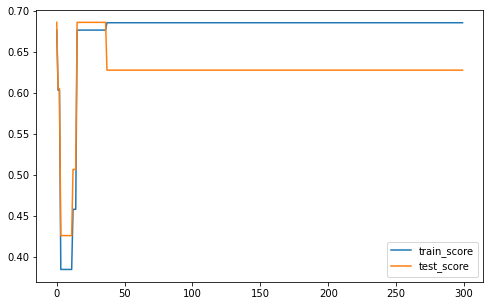

In [71]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [84]:
### 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None 모델이 스스로 찾는 최적값을 무시하고  우리가 지정해준 max_iter 값까지 수행하도록 
sc = SGDClassifier(loss='log', max_iter=150, tol=None, random_state=42)

# 훈련시키기
sc.fit(train_input,train_target)

print
print('훈련 : ',sc.score(train_input, train_target))
print('테스트 : ',sc.score(test_input,test_target))

# [해석]
# 훈련 :  0.7095808383233533
# 테스트 :  0.6547085201793722
# 0.01 차이 

훈련 :  0.7095808383233533
테스트 :  0.6547085201793722


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 트리의 앙상블 모델 
### - 랜덤 포레스트

In [85]:
# 랜덤포레스트 객체생성 : 코어 모두 사용
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs= -1 , random_state=37)

# 교차검증 진행
# - return_train_score : 검증결과 반환받기
from sklearn.model_selection import cross_validate
scores = cross_validate(rfc,train_input, train_target, return_train_score = True, n_jobs=-1)

# 최종 훈련평가 결과 및 검증결과
print('트리의 앙상블 모델 (랜덤포레스트)')
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))


트리의 앙상블 모델 (랜덤포레스트)
0.7095810143862229
0.7095836606441477


## 트리의 앙상블 모델
###  - 엑스트라트리

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_jobs= -1 , random_state=37)

from sklearn.model_selection import cross_validate
scores = cross_validate(etc,train_input, train_target,return_train_score=True,n_jobs=-1)

# 최종 훈련평가 결과 및 검증 결과
print('트리의 앙상블 모델 (엑스트라트리)')
print('훈련 : ',np.mean(scores['train_score']))
print('테스트 ; ',np.mean(scores['test_score']))

트리의 앙상블 모델 (엑스트라트리)
훈련 :  0.7095810143862229
테스트 ;  0.7095836606441477


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier(random_state=37)

from sklearn.model_selection import cross_validate
scores = cross_validate(gdc,train_input, train_target,return_train_score=True,n_jobs=-1)

# 최종 훈련평가 결과 및 검증 결과
print('트리의 앙상블 모델(그래디언트 부스팅)')
print('훈련 : ' ,np.mean(scores['train_score']))
print('테스트 : ',np.mean(scores['test_score']))


트리의 앙상블 모델(그래디언트 부스팅)
훈련 :  0.7095810143862229
테스트 :  0.7095836606441477


## 트리의 앙상블 모델 
### - 히스토그램기반 그래디언트 부스팅

In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier(random_state=37)
scores= cross_validate(hgbc,train_input, train_target,return_train_score=True,n_jobs=-1)
print('히스토그램기반 그래디언트부스팅(Histogram-base Gradient Boosting)')
print('훈련 : ' ,np.mean(scores['train_score']))
print('테스트 : ',np.mean(scores['test_score']))

히스토그램기반 그래디언트부스팅(Histogram-base Gradient Boosting)
훈련 :  0.7095810143862229
테스트 :  0.7095836606441477


In [ ]:
## [해석]
## 앙상블 모델을 사용했을때 훈련모델과 테스트 모델의 결정계수 차이가 매우 적은 것을 알 수 있습니다
## 과대, 과소적합에는 해당되지 않는다.
## 훈련 :  0.7095810143862229
## 테스트 :  0.7095836606441477
## 독립변수 : alone, pclass
## 종속변수 : survived 
## 분류 정확도가 대략 70% 임을 확인할 수 있다 